Marker "Starting Cognitive Load Tasks: Balls True, Numbers False, Wheel False" @ 17070.75s
Marker "Stopping Cognitive Load Tasks" @ 17110.76s
Marker "Starting Cognitive Load Tasks: Balls True, Numbers True, Wheel False" @ 17124.00s
Marker "Stopping Cognitive Load Tasks" @ 17164.01s
Marker "Starting Cognitive Load Tasks: Balls True, Numbers True, Wheel True" @ 17184.49s
Marker "Stopping Cognitive Load Tasks" @ 17224.50s
Marker "Starting Cognitive Load Tasks: Balls True, Numbers False, Wheel False" @ 17311.47s
Marker "Stopping Cognitive Load Tasks" @ 17351.48s
Marker "Starting Cognitive Load Tasks: Balls True, Numbers True, Wheel False" @ 17363.84s
Marker "Stopping Cognitive Load Tasks" @ 17403.85s
Marker "Starting Cognitive Load Tasks: Balls True, Numbers True, Wheel True" @ 17421.51s
Marker "Stopping Cognitive Load Tasks" @ 17461.52s
Marker "Starting Cognitive Load Tasks: Balls True, Numbers False, Wheel False" @ 17519.22s
Marker "Stopping Cognitive Load Tasks" @ 17559.23s
Marker "Star

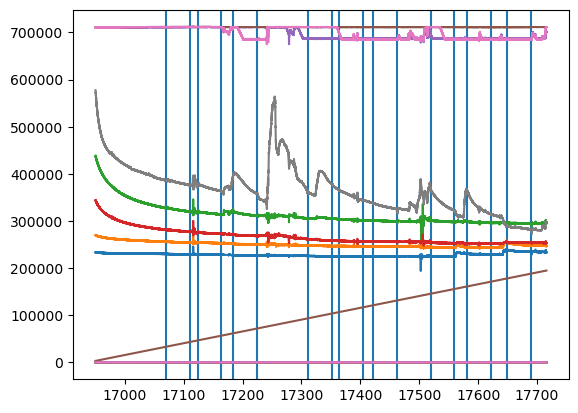

In [4]:
import pyxdf
import matplotlib.pyplot as plt
import numpy as np

data, header = pyxdf.load_xdf('data/test2.xdf')

for stream in data:
    y = stream['time_series']

    if isinstance(y, list):
        # list of strings, draw one vertical line for each marker
        for timestamp, marker in zip(stream['time_stamps'], y):
            plt.axvline(x=timestamp)
            print(f'Marker "{marker[0]}" @ {timestamp:.2f}s')
    elif isinstance(y, np.ndarray):
        # numeric data, draw as lines
        plt.plot(stream['time_stamps'], y)
    else:
        raise RuntimeError('Unknown stream format')

plt.show()

Using default location ~/mne_data for misc...
Creating ~/mne_data
Dataset misc version 0.0 out of date, latest version is 0.23


0.00B [00:00, ?B/s]     
Untarring contents of '/home/weiss/mne_data/mne-misc-data-0.23.tar.gz' to '/home/weiss/mne_data'


Attempting to create new mne-python configuration file:
/home/weiss/.mne/mne-python.json
Creating RawArray with float64 data, n_channels=3, n_times=2320128
    Range : 0 ... 2320127 =      0.000 ...   232.013 secs
Ready.
Using matplotlib as 2D backend.


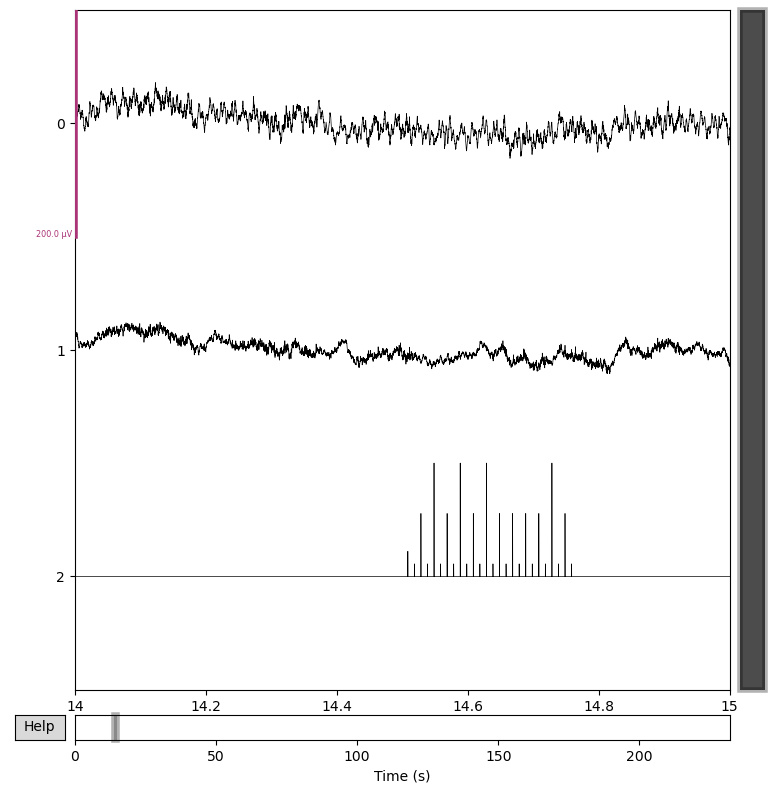

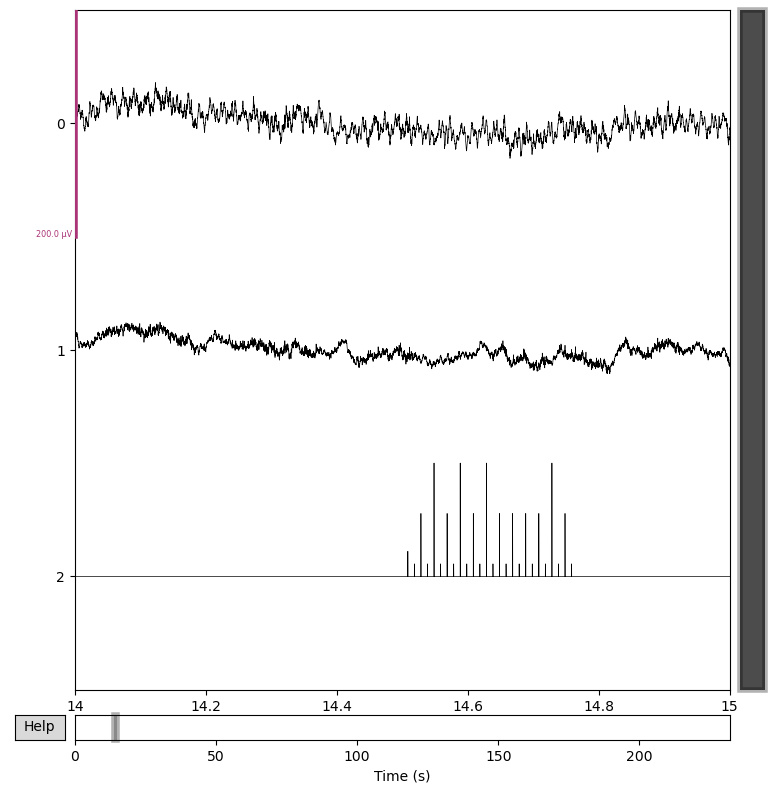

In [7]:
import pyxdf

import mne
from mne.datasets import misc

fname = (
    misc.data_path() / 'xdf' /
    'sub-P001_ses-S004_task-Default_run-001_eeg_a2.xdf')
streams, header = pyxdf.load_xdf(fname)
data = streams[0]["time_series"].T
assert data.shape[0] == 5  # four raw EEG plus one stim channel
data[:4:2] -= data[1:4:2]  # subtract (rereference) to get two bipolar EEG
data = data[::2]  # subselect
data[:2] *= (1e-6 / 50 / 2)  # uV -> V and preamp gain
sfreq = float(streams[0]["info"]["nominal_srate"][0])
info = mne.create_info(3, sfreq, ["eeg", "eeg", "stim"])
raw = mne.io.RawArray(data, info)
raw.plot(scalings=dict(eeg=100e-6), duration=1, start=14)

In [26]:

import pyxdf

import mne

fname = 'data/test2.xdf'
streams, header = pyxdf.load_xdf(fname)

# general structure
print(streams[0].keys())

# markers
# first treatment start
print(streams[0]['time_series'][0])
print(streams[0]['time_stamps'][0])
# first treatment stop
print(streams[0]['time_series'][1])
print(streams[0]['time_stamps'][1])


dict_keys(['info', 'footer', 'time_series', 'time_stamps'])
['Starting Cognitive Load Tasks: Balls True, Numbers False, Wheel False']
17070.75018659265
['Stopping Cognitive Load Tasks']
17110.756591294514


In [29]:
# data
data = streams[1]["time_series"]
data.shape
#data[:8:2] -= data[1:8:2]  # subtract (rereference) to get two bipolar EEG
#data = data[::2]  # subselect
#data[:2] *= (1e-6 / 50 / 2)  # uV -> V and preamp gain
#sfreq = float(streams[0]["info"]["nominal_srate"][0])
#info = mne.create_info(3, sfreq, ["eeg", "eeg", "stim"])
#raw = mne.io.RawArray(data, info)
#raw.plot(scalings=dict(eeg=100e-6), duration=1, start=14)

(191635, 17)